In [9]:
import pandas as pd
from os import listdir
from Utils_16S_Analysis import *

import matplotlib.pyplot as plt
rcParams = {'font.size': 24, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

In [2]:
data_dir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Blast_Alignments/'
allele_types = ['Alpha','Beta','Gamma']
Alleles = ['A','B','C']
df_Alleles = pd.DataFrame()

for i in range(0, len(allele_types)):
    Allele = Alleles[i]
    samples = listdir(data_dir+allele_types[i]+'_Alleles/paf_files/')
    for s in samples:
        if s.startswith('HotsprSample'):
            sample = s.replace("HotsprSample","").replace("_FD.paf","")
            df = Load_PAF(data_dir+allele_types[i]+'_Alleles/paf_files/'+s, sample, flip = True)
            df['Allele'] = Allele
            df_Alleles = df_Alleles.append(df)

14661 14796
19832 19989
40579 40861
11649 11740
18542 18707
18379 18532
31797 32045
14010 14098
16363 16506
20990 21143
42799 43084
12927 13015


In [12]:
Gene_Blast_grouped = {'MS50':pd.DataFrame(),'MS55':pd.DataFrame(),'MS60':pd.DataFrame(),'MS65':pd.DataFrame()} 

for s in df_Alleles['Sample'].unique():
    print(s)
    Temp = df_Alleles[df_Alleles['Sample'] == s]
    idx = Temp.groupby(['Query','Allele'])['MisMatches'].transform(min) == Temp['MisMatches']
    Temp = Temp.loc[idx]
    Temp = Temp.drop_duplicates('Query')
    Temp = Temp.groupby(['MisMatches']).count()[['Query']]
    Temp['Divergence'] = Temp.index/150*100     
    Temp['Counts'] = np.cumsum(Temp['Query'])    
    Temp['Normalized_Counts'] = Temp['Counts']/Temp['Query'].sum()
    Temp['Rev_Cumulative'] = 1-Temp['Normalized_Counts']
    Gene_Blast_grouped[s] = Temp    
    Gene_Blast_grouped[s]['Rev_Cumulative'] = 1 - Gene_Blast_grouped[s]['Normalized_Counts']
    
Gene_Blast_grouped_AB = {'MS50':pd.DataFrame(),'MS55':pd.DataFrame(),'MS60':pd.DataFrame(),'MS65':pd.DataFrame()} 

for s in df_Alleles['Sample'].unique():
    print(s)
    Temp = df_Alleles[df_Alleles['Sample'] == s]
    Temp = Temp[Temp['Allele'] != 'C']
    idx = Temp.groupby(['Query','Allele'])['MisMatches'].transform(min) == Temp['MisMatches']
    Temp = Temp.loc[idx]
    Temp = Temp.drop_duplicates('Query')
    Temp = Temp.groupby(['MisMatches']).count()[['Query']]
    Temp['Divergence'] = Temp.index/150*100     
    Temp['Counts'] = np.cumsum(Temp['Query'])    
    Temp['Normalized_Counts'] = Temp['Counts']/Temp['Query'].sum()
    Temp['Rev_Cumulative'] = 1-Temp['Normalized_Counts']
    Gene_Blast_grouped_AB[s] = Temp    
    Gene_Blast_grouped_AB[s]['Rev_Cumulative'] = 1 - Gene_Blast_grouped_AB[s]['Normalized_Counts']

MS50
MS60
MS65
MS55
MS50
MS60
MS65
MS55


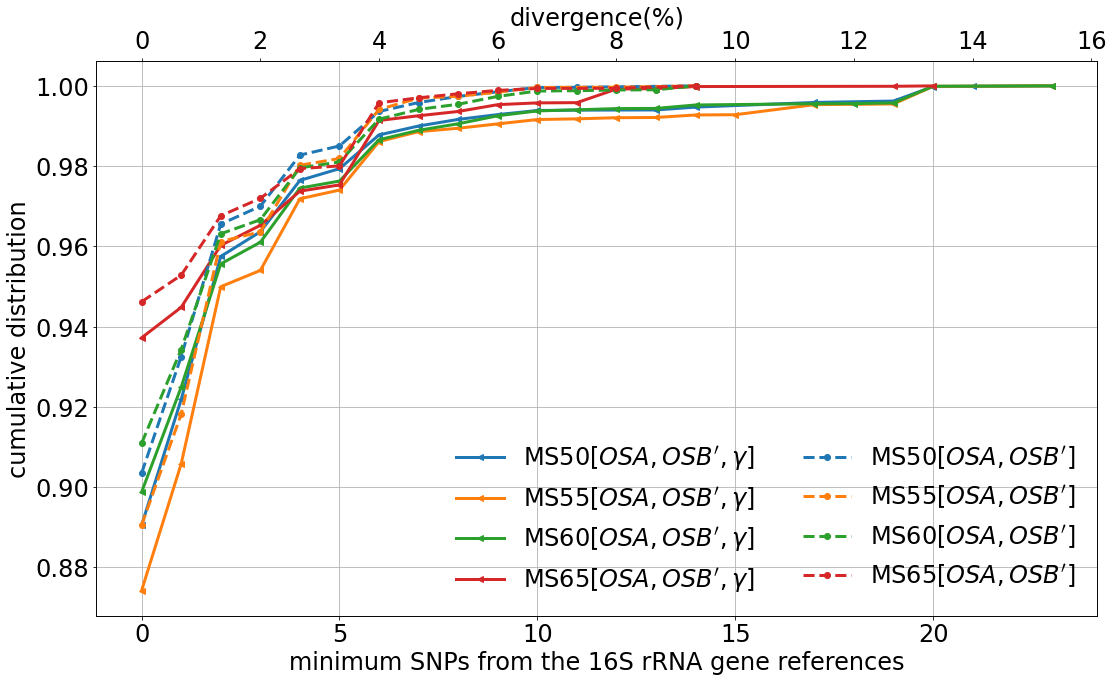

In [21]:
outpath = '/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Single_Cell_Analyses/'

fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65'] 
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r'$[OSA, OSB^{\prime}, \gamma]$'
    ax.plot(Gene_Blast_grouped[s].index.tolist(), 
            Gene_Blast_grouped[s].Normalized_Counts.tolist(), 
            linewidth = 3, label = label_1, color = c, marker = '<')

for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r'$[OSA, OSB^{\prime}]$'
    ax.plot(Gene_Blast_grouped_AB[s].index.tolist(), 
            Gene_Blast_grouped_AB[s].Normalized_Counts.tolist(), linestyle = '--',
            linewidth = 3, label = label_1, color = c, marker = 'o')
    
ax.grid()
ax.set_xlabel(r'minimum SNPs from the 16S rRNA gene references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel('cumulative distribution')
#ax.set_ylim([0,1.02])
ax.legend(ncol = 2, loc = 4, frameon = False)
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)

fig.tight_layout()
fig.savefig(outpath+'Cumulative-Distribtuion-16S-MS-Samples.pdf')

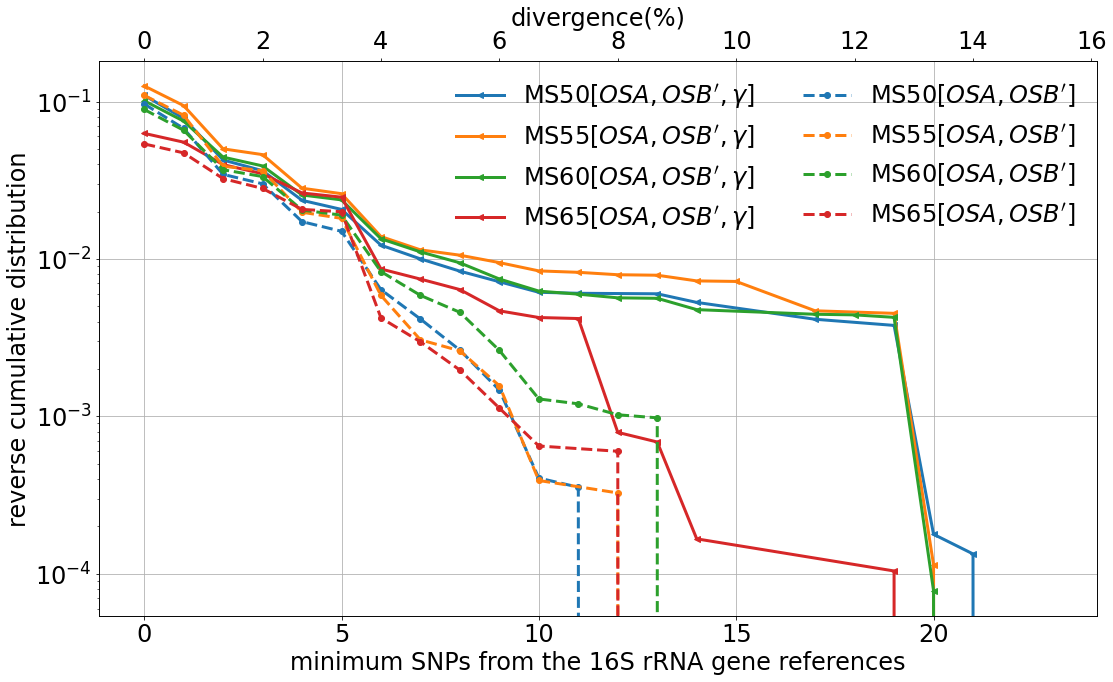

In [22]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65'] 
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r'$[OSA, OSB^{\prime}, \gamma]$'
    ax.plot(Gene_Blast_grouped[s].index.tolist(), 
            Gene_Blast_grouped[s].Rev_Cumulative.tolist(), 
            linewidth = 3, label = label_1, color = c, marker = '<')

for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r'$[OSA, OSB^{\prime}]$'
    ax.plot(Gene_Blast_grouped_AB[s].index.tolist(), 
            Gene_Blast_grouped_AB[s].Rev_Cumulative.tolist(), linestyle = '--',
            linewidth = 3, label = label_1, color = c, marker = 'o')
    
ax.grid()
ax.set_xlabel(r'minimum SNPs from the 16S rRNA gene references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel('reverse cumulative distribution')
ax.semilogy()
ax.legend(ncol = 2, loc = 1, frameon = False)
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)

fig.tight_layout()

fig.savefig(outpath+'Reverse-Cumulative-Distribtuion-16S-MS-Samples.pdf')